# Distancias entre matriz de Campos obtenidos y array de Campos seleccionables en el SLM

Esto se hace porque el algoritmo IFTA requiere sustituir el DOE obtenido por inversión por los valores fabricables.

Por ejemplo, en un DOE de amplitud binario, se quita la fase y se sustituyen las amplitudes por 0,1 según el valor más cercano a la amplitud obtenida por la IFFT. Aquí vamos a hacer lo mismo, pero vamos a utilizar los vectores de Stokes.

Al invertir VIFTA (IFTA vectorial tendremos una imagen de $(Ex^{ij}, Ey^{ij})$, que nos da un vector de Jones. He pensado que mejor sería medir distancias a los valores $(E_x^k, E_y^k)$, que parecen más definidas. En los SLM normalmente tenemos 256 g.l. que serán las matrices de Jones asignadas a cada uno de los niveles. Como el SLM está iluminado con un haz de incidencia, tenemos 256 vectores de Jones: k = 1...256 .

Esto nos va a servir para dos cosas:
- Por una parte, nos permitirá calcular la mejor forma A-$\phi$, que es lo mismo que $(E_x^k, E_y^k)$, en funcion de los polarizadores. No se obtimiza exactamente en amplitud o fase sino aquel cuyas distancias de los campos sean mínimas.

- Por otra parte, en el proceso de iteración, los campos $(Ex^{ij}, Ey^{ij})$, de la IFFT se sustituyen por los  $(E_x^k, E_y^k)$, más cercanos.

En ambos casos es necesario medir distancias. Para la optimización es la distancia de los puntos posibles, que es la matriz cuadrada  $(E_x^k, E_y^k)$, a la curva. Se podrá hacer una selección de todos los puntos para aumentar la rapidez.

Para el segundo caso, las distnacias nos hacen elegir los valores de fabricabilidad que tiene el SLM.

En el proceso final, la matriz de sustitución también será la matriz de fabricación, pues dirá que pixeles tienen cada uno de los valores.

números, luego 1D, pero cada pixel es un vector S0,,S2,S3, luego con una matriz NxMx4 que sería el paso final.


**Para Jesús**: Habría que convertir una imagen de stokes a una array NxMx4 como uso yo, y el array de fabricabilidad en un array Kx4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Distance between arrays

### 1D

In [3]:
x= np.linspace(0,1,11)
y= np.array([0,0.5,1])

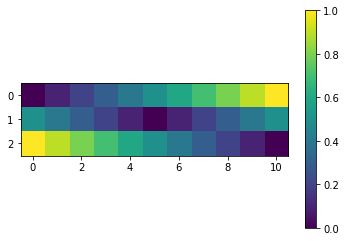

In [4]:
distances=np.abs(x[np.newaxis,:]-y[:,np.newaxis])

plt.imshow(distances)
plt.colorbar()

La pregunta es "para cada elemento x, ¿cual es el elemento de x que más se acerca?

En la gráfica está claro, ahora hay que ver como materializarlo.

In [5]:
i_mins=(distances==distances.min(axis=0))
print(i_mins)

[[ True  True  True False False False False False False False False]
 [False False False  True  True  True  True  True False False False]
 [False False False False False False False False  True  True  True]]


In [6]:
i_positions=np.argmax(i_mins, axis=0)
print(i_positions)

[0 0 0 1 1 1 1 1 2 2 2]


Estos de arriba serían los valores a los que más se acerca

Ahora habría que generar la nueva matriz con los elementos dados en este array

In [7]:
x_new=np.zeros_like(x)

x_new[i_positions==0]=0.1
x_new[i_positions==1]=0.2
x_new[i_positions==2]=0.3

In [8]:
print(x_new)

[0.1 0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.3]


### 1D con Jones

Cada punto representa $(E_x^r, E_x^i, E_y^r, E_y^i)$ 

In [9]:
x1= np.random.rand(10,4)
x2= np.random.rand(5,4)


In [10]:
distance = (x1[np.newaxis,:,:]-x2[:,np.newaxis, :])**2
distances=np.sqrt(distance.sum(axis=2))

In [11]:
distances.shape

(5, 10)

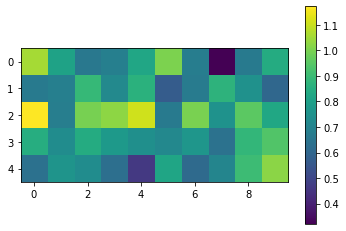

In [12]:
plt.imshow(distances)
plt.colorbar()

In [13]:
i_mins=(distances==distances.min(axis=0))
print(i_mins)

[[False False  True False False False False  True  True False]
 [False False False False False  True False False False  True]
 [False  True False False False False False False False False]
 [False False False False False False False False False False]
 [ True False False  True  True False  True False False False]]


In [14]:
i_positions=np.argmax(i_mins, axis=0)
print(i_positions)

[4 2 0 4 4 1 4 0 0 1]


In [15]:
x_new=np.zeros(x1.shape[0])

x_new[i_positions==0]=0.1
x_new[i_positions==1]=0.2
x_new[i_positions==2]=0.3
x_new[i_positions==3]=0.4
x_new[i_positions==4]=0.5


In [16]:
print(x_new.shape, x_new)

(10,) [0.5 0.3 0.1 0.5 0.5 0.2 0.5 0.1 0.1 0.2]


## NxMx4

 - DOE representa los vectores de stokes de la imagen (DOE) NxM. El 4 representa $(E_x^r, E_x^i, E_y^r, E_y^i)$ 
 - S_posible representa las posibles soluciones que en este caso son 6


In [57]:
DOE= np.random.rand(10,9,4)
E_posible= np.random.rand(6,4)

num_posibles=E_posible.shape[0]

In [58]:
distance = (DOE[np.newaxis,:,:,:]-E_posible[:,np.newaxis, np.newaxis, :])**2
distances=np.sqrt(distance.sum(axis=3))

In [59]:
distance.shape, distances.shape

((6, 10, 9, 4), (6, 10, 9))

In [60]:
i_mins=(distances==distances.min(axis=0))
print(i_mins.shape)

(6, 10, 9)


### Esta sería la matriz de sustitución

In [61]:
i_positions=np.argmax(i_mins, axis=0)
print(i_positions.shape)
print(i_positions)

(10, 9)
[[2 4 0 1 2 2 5 2 1]
 [1 5 5 1 2 2 4 5 0]
 [3 3 2 1 0 3 1 4 4]
 [5 1 1 1 4 5 2 5 0]
 [5 5 5 5 4 2 2 0 1]
 [0 1 5 5 4 5 5 1 4]
 [0 2 3 4 0 0 5 5 3]
 [2 1 5 4 5 2 5 1 4]
 [5 5 2 5 0 0 5 2 4]
 [5 4 1 2 0 2 3 1 2]]


### Esta sería la nueva imagen, sustituyendo los vectores de Stokes por los más cercanos

In [62]:
DOE_new=np.zeros((DOE.shape[0],DOE.shape[1], 4))
print(DOE_new.shape)

DOE_new[i_positions==0]=E_posible[0,:]
DOE_new[i_positions==1]=E_posible[1,:]
DOE_new[i_positions==2]=E_posible[2,:]
DOE_new[i_positions==3]=E_posible[3,:]
DOE_new[i_positions==4]=E_posible[4,:]
DOE_new[i_positions==5]=E_posible[5,:]


(10, 9, 4)


**Esta es la buena**

In [63]:
DOE_new2=np.zeros((DOE.shape[0],DOE.shape[1], 4))
print(DOE_new2.shape)

for i in range(num_posibles):
        DOE_new2[i_positions==i]=E_posible[i,:]

(10, 9, 4)


In [64]:
(DOE_new-DOE_new2).sum()

0.0

In [65]:
(DOE_new2[:,:,0].flatten().reshape(DOE.shape[0], DOE.shape[1]))

array([[0.82554629, 0.45198017, 0.06668511, 0.83780153, 0.82554629,
        0.82554629, 0.0870626 , 0.82554629, 0.83780153],
       [0.83780153, 0.0870626 , 0.0870626 , 0.83780153, 0.82554629,
        0.82554629, 0.45198017, 0.0870626 , 0.06668511],
       [0.87136234, 0.87136234, 0.82554629, 0.83780153, 0.06668511,
        0.87136234, 0.83780153, 0.45198017, 0.45198017],
       [0.0870626 , 0.83780153, 0.83780153, 0.83780153, 0.45198017,
        0.0870626 , 0.82554629, 0.0870626 , 0.06668511],
       [0.0870626 , 0.0870626 , 0.0870626 , 0.0870626 , 0.45198017,
        0.82554629, 0.82554629, 0.06668511, 0.83780153],
       [0.06668511, 0.83780153, 0.0870626 , 0.0870626 , 0.45198017,
        0.0870626 , 0.0870626 , 0.83780153, 0.45198017],
       [0.06668511, 0.82554629, 0.87136234, 0.45198017, 0.06668511,
        0.06668511, 0.0870626 , 0.0870626 , 0.87136234],
       [0.82554629, 0.83780153, 0.0870626 , 0.45198017, 0.0870626 ,
        0.82554629, 0.0870626 , 0.83780153, 0.45198017],


## Cálculo de las distancias de los puntos NxM de la matriz cuadrada a los puntos fabricables

Aquí nos vamos a centrar en el primer problema, que es calcular las distancias del espacio (Ex, Ey) de valores posibles a los campos fabricables (generados por el SLM). 

Supongamos que el campo esté normalizalizado entre (-1 y 1)

In [75]:
num_data_x = 16
num_data_y = 16

ex_r = np.linspace(-1,1, num_data_x)
ex_i = np.linspace(-1,1, num_data_x)
ey_r = np.linspace(-1,1, num_data_y)
ey_i = np.linspace(-1,1, num_data_y)

Ex_r,Ex_i = np.meshgrid(ex_r, ex_i)
Ey_r,Ey_i = np.meshgrid(ey_r, ey_i)


Ax = np.sqrt(Ex_r**2 + Ex_i**2)
Ay = np.sqrt(Ey_r**2 + Ey_i**2)
phix =np.arctan2(Ex_i,Ex_r)
phiy =np.arctan2(Ey_i,Ey_r)

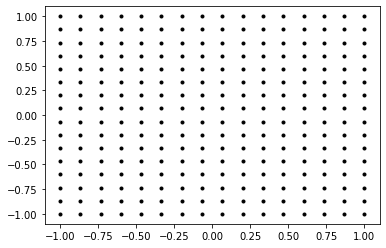

In [76]:
plt.plot(Ex_r, Ex_i,'k.');

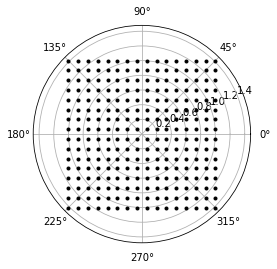

In [81]:
plt.polar(phix,Ax,'k.');

Posibilidad 2

In [ ]:
um_data_x = 16
num_data_y = 16

ax = np.linspace(0,1, num_data_x)
fx = np.linspace(0, 2*np.pi, num_data_x)
ay = np.linspace(0,1, num_data_y)
fy = np.linspace(0, 2*np.pi, num_data_y)

Ax, Fx = np.meshgrid(ax, fx)
Ay, Fy = np.meshgrid(ay, fy)

Ex_r = Ax*np.cos(Fx)
Ex_i= Ax*np.sin(Fx)

Ax = np.sqrt(Ex_r**2 + Ex_i**2)
Ay = np.sqrt(Ey_r**2 + Ey_i**2)
phix =np.arctan2(Ex_i,Ex_r)
phiy =np.arctan2(Ey_i,Ey_r)